# Análise das candidaturas a vereador nas eleições de 2020 na Bahia

### - Dados

As candidaturas possuem até o dia 15 de Dezembro para declarar suas contas.

Os dados utilizados nesta análise podem ser baixados no site do [Tribunal Superior Eleitoral (TSE)](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais).

Baixe o arquivo: http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2020.zip (downloaded in 22/12/2020)

Na mesma pasta deste notebook, crie uma pasta chamada data.

Em seguida, mova a pasta `prestacao_de_contas_eleitorais_candidatos_2020`
(extraída do arquivo), para a pasta data.

Dicionario de dados: `leiame_receitas-candidatos.pdf`

### - Perguntas

Algumas perguntas surgem deste dataset:

- Para um dado município, quem são os atores mais importantes?
- Como são as candidaturas na Bahia?
- Quem são as pessoas físicas doadoras?
- Quais são os gastos da campanha?
- Quais as empresas mais beneficiadas?


### Entrevistar vereadores:

- Parabéns pela eleição etc
- De onde veio o dinheiro? Por que o partido resolveu apoiar você e não outros?
- Quais são os principais gastos da campanha?
- Sua campanha custou X para os cidadãos. Daria pra comprar Y cestas básicas. Qual o saldo que você espera devolver pros cidadãos ao longo dos 4 anos de mandato?

### ETL

A seguir a etapa de extração, transformação e load (carregamento) dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scripts.parsers import currency_to_float

%matplotlib notebook

[nltk_data] Downloading package stopwords to /home/guiga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def format_float(num):
    num = round(num, 2)
    num = str(num)
    num = num.replace(".", ",")

    dot_index = abs(num.index(",") - len(num))
    dots = [i for i in range(dot_index+2,len(num)-1,3)]
    
    str_num = []
    if dot_index < 3:
        str_num.append("0")
    for i, digit in enumerate(num[::-1]):
        str_num.insert(0, digit)
        if i in dots:
            str_num.insert(0, ".")
    return "".join(str_num)

def format_int(num):
    num = str(num)
    str_num = []
    for i, digit in enumerate(num[::-1]):
        if (i>0) and (i % 3 == 0):
            str_num.insert(0, ".")
        str_num.insert(0, digit)
    return "".join(str_num)

def format_num(num):
    if isinstance(num, int):
        return format_int(num)
    if isinstance(num, float):
        return format_float(num)
    raise KeyError(f"{type(num)} is not a supported number format")

### Preparação dos dados

In [90]:
state = 'BA'
folder = "data/"
persistence_folder = "textos/candidaturas_bahia/analise_vereadores/"

In [4]:
path = f"{folder}votacao_candidato_munzona_2020/votacao_candidato_munzona_2020_{state}.csv"
results = pd.read_csv(path, encoding="latin", delimiter=";")

In [5]:
columns = ["SQ_CANDIDATO",
           "NM_CANDIDATO",
           "NM_URNA_CANDIDATO",
           "NM_UE",
           "SG_PARTIDO",
           "DS_SIT_TOT_TURNO",
           "QT_VOTOS_NOMINAIS",
           "DS_CARGO"
]
aldermen = results[columns]

In [6]:
columns.remove("QT_VOTOS_NOMINAIS")
aldermen = aldermen.groupby(columns).agg({"QT_VOTOS_NOMINAIS": sum})
aldermen = aldermen.reset_index()
aldermen.sample(10).T

,24752,34927,14184,32594,28353,21691,29948,23932,20978,24387
SQ_CANDIDATO,50001099186,50001237051,50000869410,50001212929,50001156673,50001055034,50001184645,50001084267,50001036432,50001091067
NM_CANDIDATO,MARCOS ANTONIO DE SOUZA BARBOSA,MILENA LIMA LINS LEAL,LUCINEIDE BRAZ DA SILVA,DVANIE MIRANDA DOS SANTOS,NIELTON FRANC NOGUEIRA CASTRO,ISAÍAS DE FREITAS BISPO,DIEGO PEREIRA DE OLIVEIRA BRITO,ADNALDO DOS SANTOS CASCALHO,CLERISTON GRIGORIO DE ARAUJO,AVANI TRINDADE DA SILVA
NM_URNA_CANDIDATO,MARCOS DE MANOEL DA AMBULÂNCIA,MILENA LINS,JUCY BRAZ,DVANIÊ MIRANDA,TINHO DAS CASINHAS,ISAÍAS GUARDA,DIEGO MARCHANTE,DINA DA CESTA,NEGUINHO DO GRIGORIO,AVANI DO SINDICATO
NM_UE,IBIRATAIA,CONDE,SENHOR DO BONFIM,IRARÁ,CASA NOVA,SANTA BÁRBARA,MAIRI,MASCOTE,ANDORINHA,CAPIM GROSSO
SG_PARTIDO,PL,MDB,PL,MDB,PL,PODE,PC do B,PTC,PSC,PSDB
DS_SIT_TOT_TURNO,ELEITO POR QP,SUPLENTE,NÃO ELEITO,SUPLENTE,SUPLENTE,NÃO ELEITO,SUPLENTE,NÃO ELEITO,ELEITO POR QP,SUPLENTE
DS_CARGO,Vereador,Vereador,Vereador,Vereador,Vereador,Vereador,Vereador,Vereador,Vereador,Vereador
QT_VOTOS_NOMINAIS,632,20,7,45,108,38,280,18,681,170


In [7]:
aldermen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37213 entries, 0 to 37212
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SQ_CANDIDATO       37213 non-null  int64 
 1   NM_CANDIDATO       37213 non-null  object
 2   NM_URNA_CANDIDATO  37213 non-null  object
 3   NM_UE              37213 non-null  object
 4   SG_PARTIDO         37213 non-null  object
 5   DS_SIT_TOT_TURNO   37213 non-null  object
 6   DS_CARGO           37213 non-null  object
 7   QT_VOTOS_NOMINAIS  37213 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [8]:
aldermen_count = len(aldermen)
print(f"{format_num(aldermen_count)} resultados para vereadores na base de dados")

37.213 resultados para vereadores na base de dados


No [site do TSE](https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais) constam 37.261 candidaturas aptas a vereador

In [9]:
path = f"{folder}prestacao_de_contas_eleitorais_candidatos_2020/despesas_contratadas_candidatos_2020_{state}.csv"
expendings_df = pd.read_csv(path, encoding="latin", delimiter=";")

columns = ["SQ_CANDIDATO", "DS_DESPESA", "VR_DESPESA_CONTRATADA"]

expendings_df = expendings_df[columns]
expendings_df["VR_DESPESA_CONTRATADA"] = expendings_df["VR_DESPESA_CONTRATADA"].apply(currency_to_float)
expendings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201059 entries, 0 to 201058
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SQ_CANDIDATO           201059 non-null  int64  
 1   DS_DESPESA             201059 non-null  object 
 2   VR_DESPESA_CONTRATADA  201059 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [10]:
# most_expensive_activity = expendings_df.groupby(["SQ_CANDIDATO", "DS_DESPESA"]).agg(sum)
# most_expensive_activity = most_expensive_activity.sort_values("VR_DESPESA_CONTRATADA", ascending=False)
# most_expensive_activity = most_expensive_activity.reset_index()
# most_expensive_activity = most_expensive_activity.set_index("SQ_CANDIDATO")
# most_expensive_activity = most_expensive_activity.max(axis=1, level=0, numeric_only=True)
# most_expensive_activity
# most_expensive_activity["VR_DESPESA_CONTRATADA"].idxmax(axis=1, level=0)
# most_expensive_activity.head(10)

In [11]:
# TODO: mudar a despesa da moda para a despesa com mais gasto

expendings_gp = (expendings_df.groupby(["SQ_CANDIDATO"])
                 .agg({"VR_DESPESA_CONTRATADA": sum, "DS_DESPESA": pd.Series.mode})
                 .sort_values("VR_DESPESA_CONTRATADA", ascending=False))
expendings_gp = expendings_gp.reset_index()
expendings_gp.head()

,SQ_CANDIDATO,VR_DESPESA_CONTRATADA,DS_DESPESA
0,50000674223,12296492.55,LOCACAO VEICULO
1,50000708248,3415293.83,TARIFA BANCÁRIA
2,50000913695,2719545.00,TARIFA BANCARIA
3,50000758814,2497994.59,LOCAÇÃO DE VEICULOS P/CAMPANHA ELEITORAL
4,50000824378,2435678.10,TR TEV IBC 000140


In [12]:
aldermen = aldermen.merge(expendings_gp, how="left", on="SQ_CANDIDATO")

In [13]:
path = f"{folder}prestacao_de_contas_eleitorais_candidatos_2020/receitas_candidatos_2020_{state}.csv"
earnings = pd.read_csv(path, encoding="latin", delimiter=";")

In [14]:
columns = ["SQ_CANDIDATO", "DS_RECEITA", "VR_RECEITA"]
earnings = earnings[columns]
earnings["VR_RECEITA"] = earnings["VR_RECEITA"].apply(currency_to_float)

In [15]:
# TODO: Change pd.Series.mode to biggest money source
earnings = earnings.groupby("SQ_CANDIDATO").agg({"VR_RECEITA": sum, "DS_RECEITA": pd.Series.mode})

In [16]:
# Trocar ordem. Merge left
aldermen = aldermen.merge(earnings, on="SQ_CANDIDATO", how="left")
aldermen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37213 entries, 0 to 37212
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SQ_CANDIDATO           37213 non-null  int64  
 1   NM_CANDIDATO           37213 non-null  object 
 2   NM_URNA_CANDIDATO      37213 non-null  object 
 3   NM_UE                  37213 non-null  object 
 4   SG_PARTIDO             37213 non-null  object 
 5   DS_SIT_TOT_TURNO       37213 non-null  object 
 6   DS_CARGO               37213 non-null  object 
 7   QT_VOTOS_NOMINAIS      37213 non-null  int64  
 8   VR_DESPESA_CONTRATADA  21096 non-null  float64
 9   DS_DESPESA             21096 non-null  object 
 10  VR_RECEITA             27914 non-null  float64
 11  DS_RECEITA             27914 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [17]:
aldermen.head().T

,0,1,2,3,4
SQ_CANDIDATO,50000631822,50000631823,50000631824,50000631825,50000631826
NM_CANDIDATO,TIAGO PRATES MACHADO,SELMA DE JESUS SANTOS,VANIA LUCIA PEREIRA DE ALMEIDA,FABIO COSTA DOS SANTOS,SHIRLEY VITAL DE JESUS
NM_URNA_CANDIDATO,TIAGO PRATES,SELMA DE DICA,NINHA DE DERCILIO,FABIO DO PORTELA,SHIRLEY VITAL
NM_UE,IBIRAPUÃ,IBIRAPUÃ,IBIRAPUÃ,IBIRAPUÃ,IBIRAPUÃ
SG_PARTIDO,PT,PT,PT,PT,PT
DS_SIT_TOT_TURNO,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO
DS_CARGO,Vereador,Vereador,Vereador,Vereador,Vereador
QT_VOTOS_NOMINAIS,34,16,11,10,19
VR_DESPESA_CONTRATADA,2050,1550,NaN,1850,2150
DS_DESPESA,MILITANCIA E DIST DE PROG GOVERNO,PRESTAÇÃO DE SERVIÇO,NaN,"[MILIT5ANCIA E EDIST DE PROG DE GOVERNO, MILIT...",PRESTAÇÃO DE SERVIÇO


## Comparação entre campanhas de Prefeito e Vereador

In [18]:
candidates_gp = (aldermen[["DS_CARGO", "SQ_CANDIDATO", "VR_RECEITA", "VR_DESPESA_CONTRATADA"]].groupby("DS_CARGO")
                 .agg({"SQ_CANDIDATO": "nunique", "VR_RECEITA": sum, "VR_DESPESA_CONTRATADA": sum}))
candidates_gp["VR_NAO_GASTO"] = candidates_gp["VR_RECEITA"] - candidates_gp["VR_DESPESA_CONTRATADA"]
candidates_gp.head()

,SQ_CANDIDATO,VR_RECEITA,VR_DESPESA_CONTRATADA,VR_NAO_GASTO
DS_CARGO,,,,
Prefeito,1256,1.313783e+08,1.247326e+08,6645658.90
Vereador,35953,7.808823e+07,5.502138e+07,23066852.41


In [19]:
def compare_candidatures(df, column):
    total = df[column].sum()
    aldermen = int(df.loc["Vereador", column])
    mayor = int(df.loc["Prefeito", column])
    return total, aldermen, mayor

In [20]:
total_count, ald_count, mayor_count = compare_candidatures(candidates_gp, "SQ_CANDIDATO")


print(f"Candidaturas a vereador: {format_num(aldermen_count)}\
  ({format_float(round(aldermen_count*100/total_count,2))}%) das candidaturas.\
  \nCandidaturas a Prefeito somam: {format_num(mayor_count)}\
  ({round(mayor_count*100/total_count,2)}%)")

Candidaturas a vereador: 37.213  (100,01%) das candidaturas.  
Candidaturas a Prefeito somam: 1.256  (3.38%)


In [21]:
total, ald, mayor = compare_candidatures(candidates_gp, "VR_RECEITA")

print(f"Campanhas a Vereador receberam R$ {format_num(round(ald,2))};\
 {round(ald*100/total,2)}% do total.\
\nJá campanhas a Prefeito receberam R$ {format_num(round(mayor,2))};\
 {round(mayor*100/total,2)}% do total arrecadado pelas campanhas.")

Campanhas a Vereador receberam R$ 78.088.232; 37.28% do total.
Já campanhas a Prefeito receberam R$ 131.378.293; 62.72% do total arrecadado pelas campanhas.


In [22]:
total, ald, mayor = compare_candidatures(candidates_gp, "VR_DESPESA_CONTRATADA")

print(f"Campanhas a Vereador gastaram R$ {format_num(round(ald,2))};\
 {round(ald*100/total,2)}% do total.\
\nJá campanhas a Prefeito gastaram R$ {format_num(round(mayor,2))};\
 {round(mayor*100/total,2)}% do total gasto pelas campanhas.")

Campanhas a Vereador gastaram R$ 55.021.380; 30.61% do total.
Já campanhas a Prefeito gastaram R$ 124.732.634; 69.39% do total gasto pelas campanhas.


In [24]:
total, ald, mayor = compare_candidatures(candidates_gp, "VR_NAO_GASTO")

print(f"Campanhas a Vereador não gastaram R$ {format_num(round(ald,2))} do total arrecadado;\
 {round(ald*100/total,2)}% do total não-gasto.\
\nCampanhas a Prefeito não gastaram R$ {format_num(round(mayor,2))} do total arrecadado;\
 {round(mayor*100/total,2)}% do total não gasto por vereadores e prefeitos.")

Campanhas a Vereador não gastaram R$ 23.066.852 do total arrecadado; 77.63% do total não-gasto.
Campanhas a Prefeito não gastaram R$ 6.645.658 do total arrecadado; 22.37% do total não gasto por vereadores e prefeitos.


## Análise das candidaturas a vereador

In [93]:
aldermen = aldermen[aldermen["DS_CARGO"] == "Vereador"]
aldermen = aldermen.drop("DS_CARGO", axis=1)

In [27]:
columns = ["NM_UE", "NM_CANDIDATO", "DS_ESFERA_PARTIDARIA_DOADOR", "VR_RECEITA", "SG_PARTIDO", "SQ_CANDIDATO"]
vereadores_group = (aldermen.groupby(["NM_CANDIDATO", "NM_UE", "SG_PARTIDO", "SQ_CANDIDATO", "DS_SIT_TOT_TURNO"])
                    .agg({"VR_RECEITA": sum})
                    .sort_values("VR_RECEITA", ascending=False))
vereadores_group.head(60)

,,,,,VR_RECEITA
NM_CANDIDATO,NM_UE,SG_PARTIDO,SQ_CANDIDATO,DS_SIT_TOT_TURNO,
GERALDO ALVES FERREIRA JÚNIOR,SALVADOR,MDB,50000721040,ELEITO POR QP,451000.00
ALBERTO MAGALHÃES PIMENTEL JUNIOR,SALVADOR,PSL,50001038195,SUPLENTE,443844.96
ANTÔNIO LÁZARO SILVA,SALVADOR,PL,50000759360,ELEITO POR MÉDIA,340000.00
SILVIO HUMBERTO DOS PASSOS CUNHA,SALVADOR,PSB,50000913254,ELEITO POR QP,265458.82
MARCELLE CARVALHO DE MORAES,SALVADOR,DEM,50000816236,ELEITO POR QP,211400.00
RIVAILTON PINTO VELOSO DA SILVA,SALVADOR,PTC,50000856531,NÃO ELEITO,200000.00
ALEXANDRE ALELUIA DANTAS DA COSTA,SALVADOR,DEM,50000816248,ELEITO POR QP,199070.00
MARTA RODRIGUES SOUSA DE BRITO COSTA,SALVADOR,PT,50001070207,ELEITO POR QP,196100.00
ANDRE MOREIRA FRAGA,SALVADOR,PV,50000666009,ELEITO POR QP,191785.00


<IPython.core.display.Javascript object>


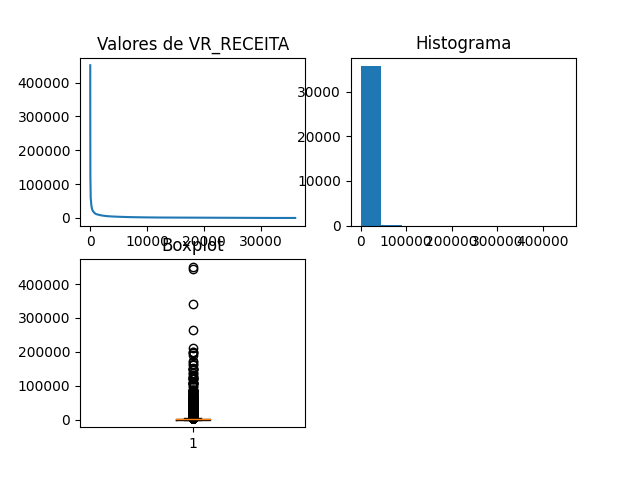

In [28]:
# Distribuição do financiamento das campanhas dos vereadores

def plot_distributions(series):

    plt.figure();
    ax = plt.subplot(2,2,1);

    xs = [i for i in range(len(series))]
    plt.plot(xs, series);
    plt.title(f"Valores de {series.name}");

    plt.subplot(2,2,2);
    plt.hist(series);
    plt.title("Histograma")

    plt.subplot(2,2,3);
    plt.boxplot(series);
    plt.title("Boxplot")
    
plot_distributions(vereadores_group["VR_RECEITA"])

In [29]:
total_budget = vereadores_group["VR_RECEITA"].sum()
print(f"Receita total das campanhas para vereador na Bahia foi de R$ {format_num(total_budget)}")
vereadores_group.describe()

Receita total das campanhas para vereador na Bahia foi de R$ 78.088.232,67


,VR_RECEITA
count,35953.00000
mean,2171.95318
std,7660.35331
min,0.00000
25%,0.00000
50%,670.00000
75%,1950.00000
max,451000.00000


In [30]:
percentis = np.percentile(vereadores_group["VR_RECEITA"], q=[50, 80, 90, 95, 99])
percentis

array([  670.   ,  2450.   ,  4641.216,  8000.   , 24686.   ])

In [31]:
vereadores_group["RECEITA_ACUMULADA"] = vereadores_group["VR_RECEITA"].cumsum()
vereadores_group["PERCENT_RECEITA_ACUM"] = vereadores_group["RECEITA_ACUMULADA"]*100/ total_budget
vereadores_group.head(10)

,,,,,VR_RECEITA,RECEITA_ACUMULADA,PERCENT_RECEITA_ACUM
NM_CANDIDATO,NM_UE,SG_PARTIDO,SQ_CANDIDATO,DS_SIT_TOT_TURNO,,,
GERALDO ALVES FERREIRA JÚNIOR,SALVADOR,MDB,50000721040,ELEITO POR QP,451000.00,451000.00,0.577552
ALBERTO MAGALHÃES PIMENTEL JUNIOR,SALVADOR,PSL,50001038195,SUPLENTE,443844.96,894844.96,1.145941
ANTÔNIO LÁZARO SILVA,SALVADOR,PL,50000759360,ELEITO POR MÉDIA,340000.00,1234844.96,1.581346
SILVIO HUMBERTO DOS PASSOS CUNHA,SALVADOR,PSB,50000913254,ELEITO POR QP,265458.82,1500303.78,1.921293
MARCELLE CARVALHO DE MORAES,SALVADOR,DEM,50000816236,ELEITO POR QP,211400.00,1711703.78,2.192012
RIVAILTON PINTO VELOSO DA SILVA,SALVADOR,PTC,50000856531,NÃO ELEITO,200000.00,1911703.78,2.448133
ALEXANDRE ALELUIA DANTAS DA COSTA,SALVADOR,DEM,50000816248,ELEITO POR QP,199070.00,2110773.78,2.703063
MARTA RODRIGUES SOUSA DE BRITO COSTA,SALVADOR,PT,50001070207,ELEITO POR QP,196100.00,2306873.78,2.954189
ANDRE MOREIRA FRAGA,SALVADOR,PV,50000666009,ELEITO POR QP,191785.00,2498658.78,3.199789


In [44]:
# Quantos vereadores detem 80% do financiamento?
pareto = vereadores_group[vereadores_group["PERCENT_RECEITA_ACUM"] < 80]
pareto_earnings = format_num(pareto["VR_RECEITA"].sum())
print(f"{format_int(len(pareto))} das candidaturas ({round(len(pareto) *100 / aldermen_count, 2)}%)\
 arrecadaram R$ {pareto_earnings} - 80% do financiamento")

7.978 das candidaturas (21.44%) arrecadaram R$ 62.468.899,36 - 80% do financiamento


### Os 1% mais ricos:

In [33]:
expending_candidates = vereadores_group[vereadores_group["VR_RECEITA"] > percentis[-1]]
expensive_budget = expending_candidates["VR_RECEITA"].sum()

print(f"{len(expending_candidates)} candidaturas representa 1% dos candidatos a vereadores\
 ")
print(f"Os 1% mais ricos arrecadaram R$ {format_float(round(expensive_budget,2))}\
 ({format_float(round(expensive_budget*100/total_budget,2))}% do total)")

360 candidaturas representa 1% dos candidatos a vereadores 
Os 1% mais ricos arrecadaram R$ 19.381.848,65 (24,82% do total)


In [34]:
n_candidates = 10

def plot_top_candidatures(df, n_candidates=n_candidates, scale=1):
    plt.figure();
    idxs = [f"{name.split()[0]} {name.split()[-1]} ({party})\n{city}"
            for (name, city, party, _, _) in df.index[:n_candidates].to_list()]
    height = 0.8

    pad = 0.2
    tick_dist = height + pad
    yticks = np.arange(0, n_candidates*tick_dist, tick_dist) 
    plt.yticks(yticks)

    bars = plt.barh(yticks, df["VR_RECEITA"][:n_candidates] / scale, height=height, tick_label=idxs);

    ax = plt.gca()
    for bar in bars:
        ax.annotate(f"{format_float(round(bar.get_width(), 2))}",
                    (bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2 + 0.1));

    plt.margins(0.02, tight=False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.xaxis.set_visible(False)

    ax.invert_yaxis()
    plt.subplots_adjust(left=0.3)

<IPython.core.display.Javascript object>


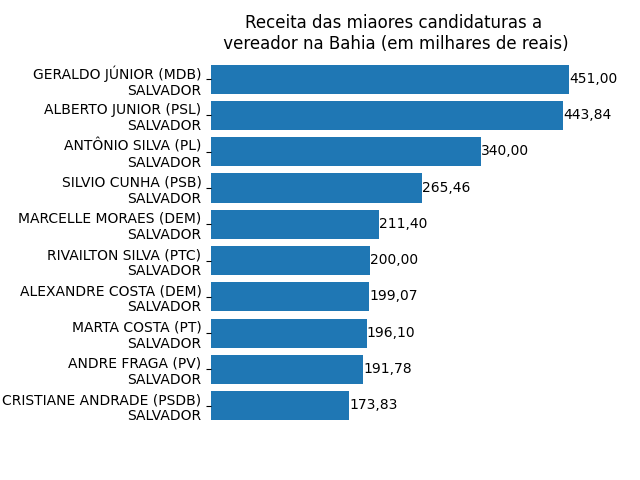

In [35]:
plot_top_candidatures(vereadores_group, scale=1_000)
plt.subplots_adjust(left=0.33)
plt.title("Receita das miaores candidaturas a\n vereador na Bahia (em milhares de reais)");

<IPython.core.display.Javascript object>


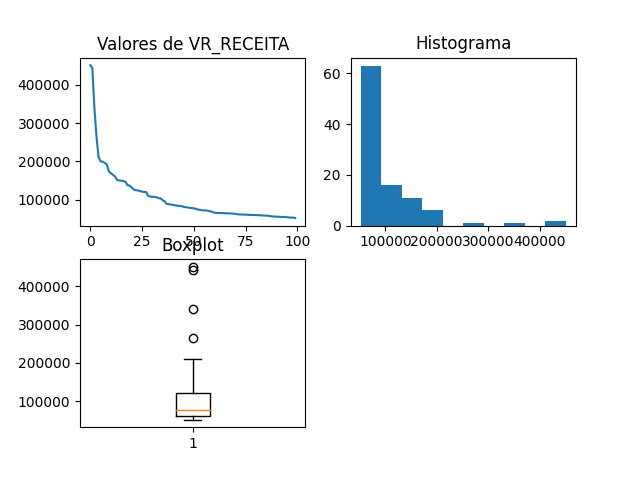

In [36]:
plot_distributions(expending_candidates.iloc[:100, 0])

## O que diferencia os 1%? Foram eleitos?

In [45]:
tstgp = (aldermen.groupby(["NM_CANDIDATO", "NM_UE", "SG_PARTIDO", "SQ_CANDIDATO", "DS_SIT_TOT_TURNO"])
         .agg({"VR_RECEITA": sum})
         .sort_values("VR_RECEITA", ascending=False))
tstgp.head(20)

,,,,,VR_RECEITA
NM_CANDIDATO,NM_UE,SG_PARTIDO,SQ_CANDIDATO,DS_SIT_TOT_TURNO,
GERALDO ALVES FERREIRA JÚNIOR,SALVADOR,MDB,50000721040,ELEITO POR QP,451000.00
ALBERTO MAGALHÃES PIMENTEL JUNIOR,SALVADOR,PSL,50001038195,SUPLENTE,443844.96
ANTÔNIO LÁZARO SILVA,SALVADOR,PL,50000759360,ELEITO POR MÉDIA,340000.00
SILVIO HUMBERTO DOS PASSOS CUNHA,SALVADOR,PSB,50000913254,ELEITO POR QP,265458.82
MARCELLE CARVALHO DE MORAES,SALVADOR,DEM,50000816236,ELEITO POR QP,211400.00
RIVAILTON PINTO VELOSO DA SILVA,SALVADOR,PTC,50000856531,NÃO ELEITO,200000.00
ALEXANDRE ALELUIA DANTAS DA COSTA,SALVADOR,DEM,50000816248,ELEITO POR QP,199070.00
MARTA RODRIGUES SOUSA DE BRITO COSTA,SALVADOR,PT,50001070207,ELEITO POR QP,196100.00
ANDRE MOREIRA FRAGA,SALVADOR,PV,50000666009,ELEITO POR QP,191785.00


### De onde são os 1% mais ricos?

In [46]:
from collections import Counter

ues = expending_candidates.index.get_level_values(1).tolist()
counter = Counter(ues)
others_count = 0
threshold = 5
for key in counter.keys():
    if counter[key] < threshold:
        others_count += counter[key]
counter["OUTRAS"] = others_count

n=10
keys=[]
values=[]
for key, value in counter.most_common(n):
    keys.append(key)
    values.append(value)

In [47]:
counter.most_common(n)

[('SALVADOR', 178),
 ('CAMAÇARI', 39),
 ('OUTRAS', 39),
 ('PORTO SEGURO', 26),
 ('LAURO DE FREITAS', 20),
 ('FEIRA DE SANTANA', 10),
 ('GUANAMBI', 10),
 ('VITÓRIA DA CONQUISTA', 7),
 ('BRUMADO', 6),
 ('SIMÕES FILHO', 5)]

<IPython.core.display.Javascript object>


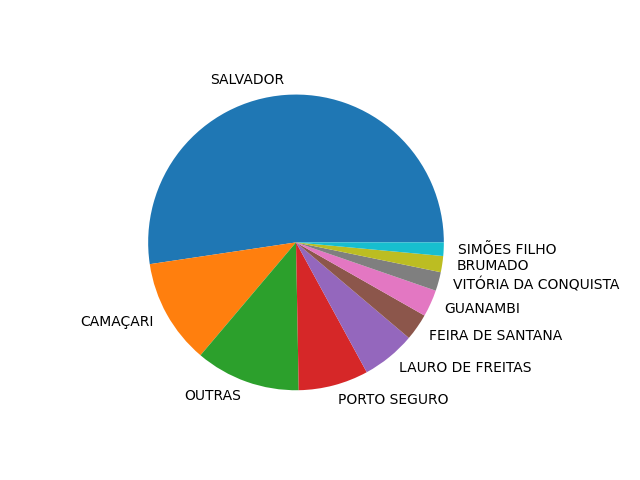

In [48]:
plt.figure();
plt.pie(values, labels=keys)
plt.subplots_adjust(right=0.8)

In [49]:
expending_candidates = expending_candidates.reset_index()
expending_candidates[expending_candidates["NM_UE"] == "FEIRA DE SANTANA"]

,NM_CANDIDATO,NM_UE,SG_PARTIDO,SQ_CANDIDATO,DS_SIT_TOT_TURNO,VR_RECEITA,RECEITA_ACUMULADA,PERCENT_RECEITA_ACUM
51,ELIZIARIO RIBEIRO DA SILVA,FEIRA DE SANTANA,REPUBLICANOS,50000854678,ELEITO POR MÉDIA,76345.75,7357065.02,9.421477
67,FERNANDO DANTAS TORRES,FEIRA DE SANTANA,PSD,50000657407,ELEITO POR MÉDIA,64159.03,8448055.85,10.818603
68,JHONATAS LIMA MONTEIRO,FEIRA DE SANTANA,PSOL,50001158623,ELEITO POR MÉDIA,63966.94,8512022.79,10.900519
91,ALBERTO MATOS NERY,FEIRA DE SANTANA,PT,50000692035,SUPLENTE,55470.00,9878132.65,12.649963
102,EREMITA MOTA DE ARAÚJO,FEIRA DE SANTANA,PSDB,50000657466,ELEITO POR QP,51081.10,10462980.03,13.398920
106,IVAMBERG DOS SANTOS LIMA,FEIRA DE SANTANA,PT,50000692055,ELEITO POR MÉDIA,50314.20,10665287.58,13.657996
121,JANAINA NASCIMENTO GONÇALVES DE QUEIROZ,FEIRA DE SANTANA,PL,50000676188,SUPLENTE,47467.50,11400075.52,14.598967
327,ANTÔNIO MAURÍCIO SANTANA DE CARVALHO,FEIRA DE SANTANA,MDB,50000958203,SUPLENTE,26324.81,18570878.25,23.781916
328,PEDRO AMÉRICO DE SANTANA SILVA LOPES,FEIRA DE SANTANA,DEM,50000658340,ELEITO POR QP,26220.45,18597098.70,23.815494
338,JOSÉ CARNEIRO ROCHA,FEIRA DE SANTANA,MDB,50000958218,ELEITO POR QP,25500.00,18855142.98,24.145947


#  Votação e despesas

## Candidatos sem votos

In [51]:
zero_votes = aldermen[aldermen["QT_VOTOS_NOMINAIS"] == 0]
zero_votes = zero_votes.sort_values("VR_DESPESA_CONTRATADA", ascending=False)
zero_votes.head()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA
6965,50000721047,VALCIMEIRE SANTOS SILVA,VALCIMERE SANTOS,SALVADOR,MDB,SUPLENTE,Vereador,0,5000.0,SERVIÇOS PRESTADO DE COORDENAÇÃO DE CAMPANHA 2020,10769.23,RADIO VIDEO E TELEVISAO
8999,50000764856,ALCIDE FRANCISCA PEREIRA MARQUES,ALCIDE MARQUES,ÉRICO CARDOSO,PSD,SUPLENTE,Vereador,0,1600.0,"[IMPRESSAO ADESIVOS DE PAPEL, IMPRESSAO SANTIN...",1627.30,#NULO#
26006,50001117054,JESSICA MAIZA OLIVEIRA ROCHA,JESSICA,PARAMIRIM,PL,SUPLENTE,Vereador,0,1463.9,[PRESTAÇÃO DE SERVIÇO DE ASSESSORAMENTO JURÍDI...,1500.00,#NULO#
23902,50001084045,GABRIELA DE JESUS SAID,GABRIELA DO TRANSPORTE ESCOLAR,MUCURI,MDB,NÃO ELEITO,Vereador,0,1432.6,[PRODUCAO DE MUSICA PARA CAMPANHA ELEITORAL 20...,1789.40,#NULO#
26014,50001117062,LINDAURA DE FRANÇA NETA,LINDAURA,PARAMIRIM,PL,SUPLENTE,Vereador,0,1400.0,[PRESTAÇÃO DE SERVIÇO DE ASSESSORAMENTO JURÍDI...,1400.00,#NULO#


In [52]:
zero_votes_count = len(zero_votes)

fname = f"{persistence_folder}SEM_VOTOS.csv"

print(f"{format_num(zero_votes_count)} vereadores receberam 0 votos nesta eleição")
print(f"Você pode conferir a lista completa no arquivo {fname}")

columns = ["NM_CANDIDATO", "NM_UE", "SG_PARTIDO", "DS_SIT_TOT_TURNO", "VR_DESPESA_CONTRATADA"]
zero_votes[columns].to_csv(fname)

644 vereadores receberam 0 votos nesta eleição
Você pode conferir a lista completa no arquivo SEM_VOTOS.csv


In [53]:
zero_votes_expendings = zero_votes["VR_DESPESA_CONTRATADA"].sum()
print(f"Embora não tenham recebido votos, os {zero_votes_count}\
 candidatos somados tiveram gastos de R$ {format_num(zero_votes_expendings)}")

Embora não tenham recebido votos, os 644 candidatos somados tiveram gastos de R$ 32.505,19


In [54]:
def get_mode_party(df):
    mode_party = df["SG_PARTIDO"].mode()[0]
    count = len(df[df["SG_PARTIDO"] == mode_party])
    return mode_party, count

mode_party, count = get_mode_party(zero_votes)
print(f"O partido com mais candidatos sem votos na Bahia foi o {mode_party}\
 com {count} candidaturas sem votação")

O partido com mais candidatos sem votos na Bahia foi o PSD com 54 candidaturas sem votação


## Candidatos com apenas um voto

In [57]:
one_vote = aldermen[aldermen["QT_VOTOS_NOMINAIS"] == 1]
one_vote = one_vote.sort_values("VR_DESPESA_CONTRATADA", ascending=False)
one_vote.head()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA
30305,50001190039,MARIVALDA MARTINS DOS SANTOS,MARIVALDA,MARAGOGIPE,PSOL,NÃO ELEITO,Vereador,1,5812.25,"[PRAGUINHAS 0·08 X 0·08, SANTINHOS 0·07 X 0·010]",6751.06,#NULO#
27165,50001138117,DAVI TOURINHO DE BRITO,DAVI TOURINHO,IRECÊ,PSOL,NÃO ELEITO,Vereador,1,2881.35,TARIFA DOC/TED,3073.64,"[#NULO#, SANTINHOS 7X10]"
24728,50001098999,ANE TATIANE PEREIRA SOUZA MONÇÃO,TATY MONÇÃO,SEBASTIÃO LARANJEIRAS,PSB,SUPLENTE,Vereador,1,2825.00,5.000 SANTINHOS,2825.00,#NULO#
14843,50000893761,MARIA CLAUDIA COSTA DE SANTANA,CLAUDINHA,RIBEIRA DO POMBAL,PL,SUPLENTE,Vereador,1,2355.00,[FILMAGEM PARA MATERIAL PUBLICITARIO ELEITORAL...,1000.00,#NULO#
6131,50000704737,NIKALICE AZEVEDO DOS SANTOS RIBEIRO,NIKALICE,ILHÉUS,PC do B,SUPLENTE,Vereador,1,2159.90,"[ASSISTENTE DE CAMPANHA, SERVIÇO DE ASSISTENTE...",3019.18,#NULO#


In [58]:
mode_party, count = get_mode_party(one_vote)
print(f"O partido com mais candidatos com apenas um voto na Bahia foi o {mode_party} com {count} candidaturas")

O partido com mais candidatos com apenas um voto na Bahia foi o PSD com 48 candidaturas


In [59]:
one_vote_expendings = one_vote["VR_DESPESA_CONTRATADA"].sum()
print(f"As despesas contratadas pelos candidatos com apenas um voto foi de R$\
 {format_num(one_vote_expendings)}")
print(f"Somadas as despesas dos candidatos sem votação, o custo total foi de R$\
 {format_num(zero_votes_expendings + one_vote_expendings)}")

As despesas contratadas pelos candidatos com apenas um voto foi de R$ 72.084,45
Somadas as despesas dos candidatos sem votação, o custo total foi de R$ 104.589,64


## Candidatos que não declararam as despesas

In [62]:
no_expenses = aldermen[aldermen["VR_DESPESA_CONTRATADA"].isnull()]
no_expenses = no_expenses.sort_values("QT_VOTOS_NOMINAIS", ascending=False)
no_expenses.head()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA
2253,50000665932,SULIVAN SANTOS AVELINO,SULIVAN SANTOS,SALVADOR,PODE,SUPLENTE,Vereador,3838,NaN,NaN,NaN,NaN
8398,50000759197,LOURIVAL EVANGELISTA COSTA NETO,LOURIVAL NETO,SALVADOR,CIDADANIA,SUPLENTE,Vereador,2937,NaN,NaN,20000.00,#NULO#
847,50000642695,JAIR NASCIMENTO FERREIRA,JAIR FERREIRA,SALVADOR,AVANTE,SUPLENTE,Vereador,2818,NaN,NaN,8578.36,"[ADESIVO 0·40 X 0·12, ADESIVO 0·44 X 0·25, ADE..."
11575,50000816166,JOSE CARLOS DA PAIXÃO RIBEIRO,ZÉ RIBEIRO,SALVADOR,PTB,SUPLENTE,Vereador,2679,NaN,NaN,NaN,NaN
227,50000633899,REGINALDO DOS SANTOS MOURA,REGIS MOURA,SALVADOR,PATRIOTA,SUPLENTE,Vereador,2579,NaN,NaN,294.11,GRAVAÇÃO DE PROGRAMAS POLÍTICOS ELEITORAIS E C...


In [63]:
elected_without_expenses = no_expenses[no_expenses["DS_SIT_TOT_TURNO"].str.contains("ELEITO POR")]
elected_without_expenses.head()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA
6499,50000708313,SAMUEL RODRIGUES DOS SANTOS,DR SAMUKA,CAMAÇARI,CIDADANIA,ELEITO POR MÉDIA,Vereador,1745,NaN,NaN,18266.13,MOBILIZAÇÃO E MILITANCIA DE RUA
13363,50000846236,SILVIO PEREIRA DA SILVA,SILVIO BAIANO,BARRA,PSDB,ELEITO POR QP,Vereador,1220,NaN,NaN,NaN,NaN
30416,50001191164,EDERJÚNIOR SANTOS DOS ANJOS,EDERJÚNIOR,ILHÉUS,PSL,ELEITO POR QP,Vereador,1206,NaN,NaN,282.50,"[PERFURADO, PRAGUINHA, SANTINHO]"
23975,50001084687,IRANDI ALVES RODRIGUES,SABIDO,BARRA,PP,ELEITO POR QP,Vereador,1163,NaN,NaN,850.00,"[15.000 UND SANTINHO TAMANHO 11 X 7CM, TERMO D..."
13354,50000846227,MARIA DO SOCORRO LEONARDO NUNES,SOCORRO,BARRA,PSDB,ELEITO POR QP,Vereador,1135,NaN,NaN,NaN,NaN


In [64]:
print(f"{format_num(len(no_expenses))} vereadores não declararam as despesas ao TSE\
 - {format_num(round(len(no_expenses)*100/aldermen_count,2))}% do total")
print(f"Destes, {len(elected_without_expenses)} foram eleitos")


fno_expenses = persistence_folder + "VEREADORES_SEM_DESPESAS.csv"
felected = persistence_folder + "VEREADORES_ELEITOS_SEM_DESPESAS.csv"

print(f"Lista completa dos vereaadores que não declararam despesas em: {fno_expenses}")
print(f"Lista dos eleitos que não declararam despesas em: {felected}")

columns=["NM_CANDIDATO", "NM_UE", "SG_PARTIDO", "DS_SIT_TOT_TURNO", "QT_VOTOS_NOMINAIS"]
no_expenses[columns].reset_index().drop("index", axis=1).to_csv(fno_expenses)
elected_without_expenses[columns].reset_index().drop("index", axis=1).to_csv(felected)

16.024 vereadores não declararam as despesas ao TSE - 43,06% do total
Destes, 445 foram eleitos
Lista completa dos vereaadores que não declararam despesas em: textos/candidaturas_bahia/analise_vereadores/VEREADORES_SEM_DESPESAS.csv
Lista dos eleitos que não declararam despesas em: textos/candidaturas_bahia/analise_vereadores/VEREADORES_ELEITOS_SEM_DESPESAS.csv


# Custo por voto

In [66]:
declared_expenses = aldermen.dropna()
declared_expenses = declared_expenses[declared_expenses["QT_VOTOS_NOMINAIS"] > 0]
declared_expenses["VR_VOTO"] = declared_expenses["VR_DESPESA_CONTRATADA"] / declared_expenses["QT_VOTOS_NOMINAIS"]
declared_expenses = declared_expenses.sort_values("VR_VOTO", ascending=False)
declared_expenses.head(50)

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA,VR_VOTO
30305,50001190039,MARIVALDA MARTINS DOS SANTOS,MARIVALDA,MARAGOGIPE,PSOL,NÃO ELEITO,Vereador,1,5812.25,"[PRAGUINHAS 0·08 X 0·08, SANTINHOS 0·07 X 0·010]",6751.06,#NULO#,5812.250000
728,50000640437,MARIA DE LOURDES ROSA DE JESUS,BILEU,PONTO NOVO,PP,SUPLENTE,Vereador,3,10000.00,SANTINHOS,10000.00,#NULO#,3333.333333
33732,50001224824,ALINE TORRES DE JESUS,PROFESSORA ALINE,ITACARÉ,PP,SUPLENTE,Vereador,6,20000.00,"[ADESIVO PERFURADO 70 X 40, ADESIVO VINIL 10 X...",20075.95,"[#NULO#, RECEBIMENTO DE DOAÇÃO ESTIMADA DOS SE...",3333.333333
27165,50001138117,DAVI TOURINHO DE BRITO,DAVI TOURINHO,IRECÊ,PSOL,NÃO ELEITO,Vereador,1,2881.35,TARIFA DOC/TED,3073.64,"[#NULO#, SANTINHOS 7X10]",2881.350000
22389,50001065300,JOÃO DE ARAÚJO,ARAUJO,CAMAÇARI,PATRIOTA,NÃO ELEITO,Vereador,42,119987.85,TARIFA TED,120920.00,"[PERFURET, SANTINHO]",2856.853571
24728,50001098999,ANE TATIANE PEREIRA SOUZA MONÇÃO,TATY MONÇÃO,SEBASTIÃO LARANJEIRAS,PSB,SUPLENTE,Vereador,1,2825.00,5.000 SANTINHOS,2825.00,#NULO#,2825.000000
14843,50000893761,MARIA CLAUDIA COSTA DE SANTANA,CLAUDINHA,RIBEIRA DO POMBAL,PL,SUPLENTE,Vereador,1,2355.00,[FILMAGEM PARA MATERIAL PUBLICITARIO ELEITORAL...,1000.00,#NULO#,2355.000000
17715,50000951025,RITA PAULINA SANTOS DE SOUZA,ÉLITA PAULA,CORRENTINA,PODE,SUPLENTE,Vereador,3,6870.00,SERVIÇOS DE ATIVIDADES RELACIONADAS A ELEIÇÃO ...,6870.00,#NULO#,2290.000000
34848,50001236454,ÁUREA MARIA REIS,LÔRA DA VESPERINA,RIACHO DE SANTANA,PSD,SUPLENTE,Vereador,5,11042.70,"[ADESIVO IMP DIGITAL15X25, ADESIVO IMP. DIGITA...",11642.70,#NULO#,2208.540000
6131,50000704737,NIKALICE AZEVEDO DOS SANTOS RIBEIRO,NIKALICE,ILHÉUS,PC do B,SUPLENTE,Vereador,1,2159.90,"[ASSISTENTE DE CAMPANHA, SERVIÇO DE ASSISTENTE...",3019.18,#NULO#,2159.900000


O maior custo por voto ficou com a candidata Marivalda Martins dos Santos (PSOL), do município de Maragogipe. Embora tenha declarado R$ 5.812,25 em despesas, a candidata recebeu apenas um voto - provavelmente o seu próprio.

Destaque também para os candidatos João de Araújo - Araújo na urna - do PATRIOTA de Camaçari e Claudia Jamille Proencia Akkari - Jamille Corretora na urna - de Lauro de Freitas, também do PATRIOTA.

O candidato declarou $R\$ 119.987,85$ em despesas e obteve apenas 42 votos, totalizando um custo por voto de $R\$ 2.856,85$, o quinto mais caro na Bahia.

Já a candidata Claudia declarou $R\$ 61.799,07$ em despesas e recebeu apenas 34 votos, ficando com um custo por voto de R$ 1.817,62. Ambos os candidatos estão entre os 1\% que mais gastaram nestas eleições

In [68]:
declared_expenses.tail()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA,VR_VOTO
27851,50001151266,JOSELMA DA CRUZ,ZELMA,MACURURÉ,PT,SUPLENTE,Vereador,132,0.70,TARIFA BANCARIA,0.70,#NULO#,0.005303
18415,50000963939,WASHINGTON SANTOS BITTENCOURT,MEGA TON,VITÓRIA DA CONQUISTA,REPUBLICANOS,NÃO ELEITO,Vereador,294,1.50,T D DIN AG,520.00,#NULO#,0.005102
28931,50001168814,LUCIANO QUIRINO DOS SANTOS,LUCIANO DE GRILO,ENCRUZILHADA,PDT,SUPLENTE,Vereador,82,0.35,TAXA DE DEVOLUÇÃO DE CHEQUE,620.35,"[#NULO#, CONFECÇÃO DE 100 ADESIVOS 10/30 E 02 ...",0.004268
5811,50000702109,CARLA LOBÔ PITA AMARAL DOS SANTOS,CARLA LOBO,CANDEIAS,REPUBLICANOS,SUPLENTE,Vereador,209,0.70,TARIFA,1568.70,SANTINHOS,0.003349
8329,50000758967,MARCOS AFONSO DE FREITAS,MARQUINHOS,VERA CRUZ,MDB,SUPLENTE,Vereador,585,1.50,TARIFA BANCARIA,1001.50,#NULO#,0.002564


O menor custo por voto ficou com Marcos Afonso de Freitas (MDB), de Vera Cruz - Marquinhos na urna. Embora tenha investido mil reais em sua própria campanha, declarou apenas o gasto de R$ 1,50 de tarifa bancária.

Esta é a mesma situação de diversos outros, que declararam apenas tarifas bancárias.

## Custo por voto entre os eleitos

In [176]:
elected_vote_cost = declared_expenses[
    declared_expenses["DS_SIT_TOT_TURNO"].str.contains("ELEITO POR")
]

elected_vote_cost.sort_values("VR_VOTO", ascending=False, inplace=True)
elected_vote_cost

<ipython-input-176-35404fb7f17a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elected_vote_cost.sort_values("VR_VOTO", ascending=False, inplace=True)


,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA,VR_VOTO
19381,50000976488,LIONETE MATSUI,LIA ARIGATÔ,PORTO SEGURO,AVANTE,ELEITO POR MÉDIA,Vereador,648,69288.00,PRESTAÇÃO SERVIÇO CAMPANHA ELEITORAL,69288.0,#NULO#,106.925926
10686,50000786158,ALEXANDRE GOMES MARQUES,ALEXANDRE MARQUES,LAURO DE FREITAS,PATRIOTA,ELEITO POR MÉDIA,Vereador,1679,150205.87,TARIFA BANCARIA,150252.8,#NULO#,89.461507
23609,50001079727,DILMO BATISTA SANTIAGO,DILMO SANTIAGO,PORTO SEGURO,PL,ELEITO POR MÉDIA,Vereador,651,55350.00,DISTRIBUIÇÃO DE MATERIAL DE CAMPANHA,55797.0,#NULO#,85.023041
8462,50000759360,ANTÔNIO LÁZARO SILVA,IRMÃO LÁZARO,SALVADOR,PL,ELEITO POR MÉDIA,Vereador,4273,339967.83,TARIFA BANCÁRIA,340000.0,#NULO#,79.561861
31341,50001204461,NAIANE JESUS DE SOUZA,NAIANE SOUZA,ITAPARICA,REPUBLICANOS,ELEITO POR QP,Vereador,277,16978.02,PREST SERV MOBILIZAÇÃO DE RUA,22650.0,"[#NULO#, CESSAO DE USO DE VEICULO]",61.292491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,50000734533,JOÃO BRITO AMORIM,JOÃO BRITO,ITORORÓ,PP,ELEITO POR QP,Vereador,699,90.00,"[SANTINHOS, TARIFA]",90.0,#NULO#,0.128755
11457,50000801752,ODENI RIBEIRO DOS SANTOS,DENI DO SÍTIO,COCOS,PSB,ELEITO POR QP,Vereador,636,78.75,"[ADESIVO 12 X 12 CM, ADESIVO 30 X 10 CM]",90.0,#NULO#,0.123821
18911,50000970009,GENISON FEITOSA DO NASCIMENTO,GÊGE,ITAPETINGA,PSB,ELEITO POR MÉDIA,Vereador,283,28.00,TARIFAS PENDENTES,1523.0,#NULO#,0.098940
20585,50001002712,JOSE LINS DANTAS,ZÉ DE LÉO,ACAJUTIBA,PP,ELEITO POR MÉDIA,Vereador,231,14.00,TARIFA FORNECIMENTO DE CHEQUE,14.0,#NULO#,0.060606


Entre os eleitos, os maiores custo por voto foram de:

- Lionete Matsui (Lia Arigatô) do AVANTE em Porto Seguro - cada voto custando R\$ 106,92
- Alexandre Marques do PATRIOTA de Lauro de Freitas, R\$ 89,46 por voto
- Dilmo Santiago do PL de Porto Seguro - R\$ 85,02 por voto
- Antônio Lázaro Silva (Irmão Lázaro), do PL de Salvador - R\$ 79,56 por voto
- Naiane Souza, do REPUBLICANOS de Itaparica, com R\$ 61,29 por voto

Entre os menores custos, destaque para Genison Feitosa do Nascimento (Gêge), do PSB de Itapetinga, que declarou arrecadação de 1.523 reais, porém só registrou 28 reais em despesas e angariou 283 votos, ficando com um custo por voto de aproximadamente 10 centavos.

## Custo por voto entre os eleitos e por município

In [132]:
def get_elected_municipality(df, municipality):
    return df[
        (df["NM_UE"] == municipality) &
        (df["DS_SIT_TOT_TURNO"].str.contains("ELEITO POR"))
    ]

salvador = get_elected_municipality(declared_expenses, "PORTO SEGURO")
salvador.head()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA,VR_VOTO
19381,50000976488,LIONETE MATSUI,LIA ARIGATÔ,PORTO SEGURO,AVANTE,ELEITO POR MÉDIA,Vereador,648,69288.00,PRESTAÇÃO SERVIÇO CAMPANHA ELEITORAL,69288.0,#NULO#,106.925926
23609,50001079727,DILMO BATISTA SANTIAGO,DILMO SANTIAGO,PORTO SEGURO,PL,ELEITO POR MÉDIA,Vereador,651,55350.00,DISTRIBUIÇÃO DE MATERIAL DE CAMPANHA,55797.0,#NULO#,85.023041
23607,50001079725,ARIANA FEHLBERG,ARIANA PRATES,PORTO SEGURO,PL,ELEITO POR QP,Vereador,1110,59590.00,DISTRIBUIÇÃO MATERIAL DE CAMPANHA,59637.0,#NULO#,53.684685
29060,50001169715,KEMPES NEVILLE SIMOES ROSA,BOLINHA,PORTO SEGURO,PSC,ELEITO POR QP,Vereador,1547,35872.18,DIVULGADORA,52217.5,#NULO#,23.188222
23675,50001080336,DERIVAL DOS SANTOS BRITO,PEPO DA VAN,PORTO SEGURO,PODE,ELEITO POR MÉDIA,Vereador,1121,20000.00,DISTRIBUIÇÃO DE MATERIAL DE CAMPANHA,20447.0,#NULO#,17.841213


In [169]:
cities = declared_expenses["NM_UE"].unique()
series = []

for city in cities:
    series.append(get_elected_municipality(declared_expenses, city)["VR_VOTO"].describe())
    
ue_vote_cost = pd.DataFrame(series, index=cities)
ue_vote_cost["dif_mean_median"] = ue_vote_cost["mean"] - ue_vote_cost["50%"]
ue_vote_cost.dropna(inplace=True)
ue_vote_cost.sort_values("50%", ascending=False, inplace=True)
ue_vote_cost.head()

,count,mean,std,min,25%,50%,75%,max,dif_mean_median
MEDEIROS NETO,10.0,18.202720,10.980408,4.339651,8.215904,18.958339,23.378177,36.092654,-0.755619
IBIRAPUÃ,9.0,16.280759,3.965284,10.793404,13.947599,16.959514,17.837838,23.012121,-0.678755
LAURO DE FREITAS,21.0,21.345784,20.569292,0.206926,9.245433,16.441416,21.600390,89.461507,4.904368
GUANAMBI,15.0,14.874002,7.782525,3.553305,7.536560,15.700803,19.343805,31.742816,-0.826801
SÃO FRANCISCO DO CONDE,13.0,13.364728,5.564515,1.370908,10.722868,14.460928,18.183616,20.166105,-1.096200


In [175]:
ue_vote_cost.sort_values("max", ascending=False, inplace=True)
ue_vote_cost.head()

,count,mean,std,min,25%,50%,75%,max,dif_mean_median
PORTO SEGURO,17.0,23.362866,29.968677,2.349160,6.065858,13.052363,17.841213,106.925926,10.310503
LAURO DE FREITAS,21.0,21.345784,20.569292,0.206926,9.245433,16.441416,21.600390,89.461507,4.904368
SALVADOR,43.0,15.422971,14.599505,0.725434,6.316572,11.173440,19.332451,79.561861,4.249531
ITAPARICA,9.0,8.995457,19.797918,0.199667,0.515759,2.122622,3.363223,61.292491,6.872835
CONCEIÇÃO DA FEIRA,9.0,14.470866,17.222226,2.686317,5.408108,9.840149,13.221154,58.688731,4.630717


Os municípios onde o voto do eleitor é mais valorizado (em termos de gasto de campanha) são Medeiros Neto, Ibirapuã e Lauro de Freitas, onde o candidato eleito médio teve um custo de cerca de 19, 17 e 16,40 reais, respectivamente.

In [165]:
import geopandas as gpd

fname = f"{folder}ba_shapefile/BA_Mun97_region.shp"
ue_shp = gpd.read_file(fname)

columns = ["MUNIC_PIO", "geometry"]
ue_shp = ue_shp[columns]
ue_shp = ue_shp.merge(ue_vote_cost, how="left", right_index=True, left_on="MUNIC_PIO")
ue_shp.set_index("MUNIC_PIO", inplace=True)

,MUNIC_PIO,geometry
274,LAJE,"POLYGON ((-39.54834 -13.15185, -39.53827 -13.1..."
354,INHAMBUPE,"POLYGON ((-38.64310 -11.69012, -38.63922 -11.6..."
251,MASCOTE,"POLYGON ((-39.57161 -15.77444, -39.57447 -15.7..."


<IPython.core.display.Javascript object>


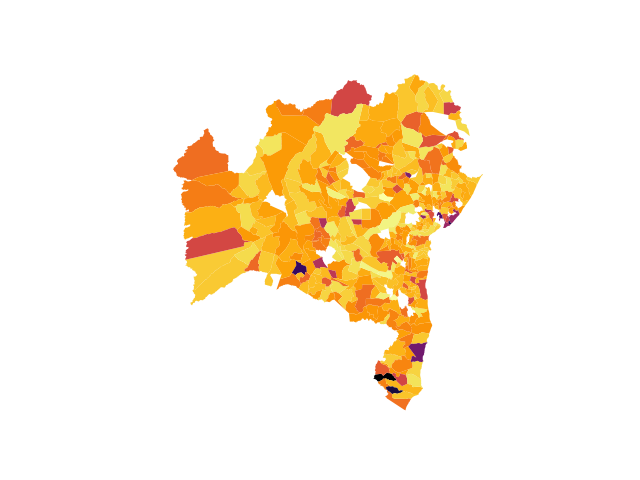

In [172]:
# Not very informative
ue_shp.plot("50%", cmap="inferno_r")
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

### Outliers no custo por voto

In [77]:
vote_cost_description = declared_expenses["VR_VOTO"].describe()
vote_cost_description

count    19279.000000
mean        26.800988
std        106.434584
min          0.002564
25%          3.483871
50%          7.375944
75%         17.857143
max       5812.250000
Name: VR_VOTO, dtype: float64

<IPython.core.display.Javascript object>


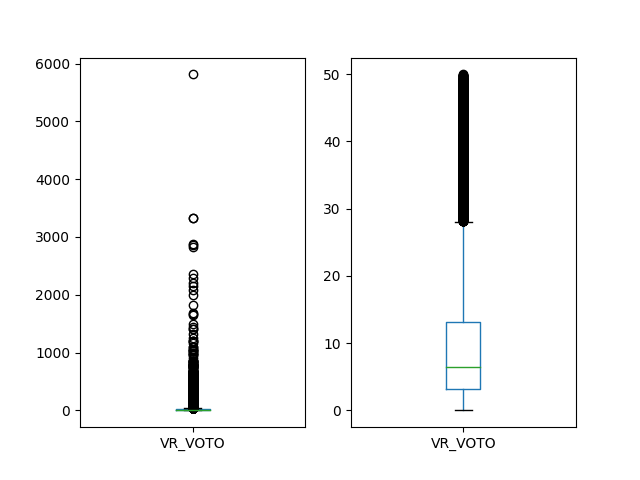

In [78]:
plt.figure();
plt.subplot(1,2,1);
declared_expenses["VR_VOTO"].plot.box();
plt.subplot(1,2,2);
declared_expenses[declared_expenses["VR_VOTO"] < 50]["VR_VOTO"].plot.box();

In [84]:
outlier_value = vote_cost_description["mean"] + vote_cost_description["std"] * 3
outlier_value

346.10473915483436

In [94]:
outliers_candidatures = declared_expenses[declared_expenses["VR_VOTO"] > outlier_value]
outliers_count = len(outliers_candidatures)
outliers_candidatures.tail()

,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_UE,SG_PARTIDO,DS_SIT_TOT_TURNO,DS_CARGO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DS_DESPESA,VR_RECEITA,DS_RECEITA,VR_VOTO
26386,50001124475,JESSICA MONTEIRO DE MAGALHAES,JESSICA MAGALHAES,CORRENTINA,PSD,SUPLENTE,Vereador,4,1400.0,"[SERVICOS ADVOCATICIOS PREST DE CONTAS, SERVIC...",1400.0,#NULO#,350.000000
26390,50001124480,MARIA APARECIDA BARBOSA DA SILVA,CIDA DE DONA EDITE,CORRENTINA,PSD,SUPLENTE,Vereador,4,1400.0,"[SERVICOS ADVOCATICIOS, SERVICOS CONTABEIS]",1400.0,#NULO#,350.000000
5429,50000700509,HELENA CRISTINA POSENER DE ANDRADE,DRA HELENA POSENER,LAURO DE FREITAS,PSD,SUPLENTE,Vereador,43,15000.0,CARTA ABERTA,18877.5,#NULO#,348.837209
33543,50001223767,NOELDA FERNANDES DA SILVA ALVES,NOELDA DA CANABRAVA,FORMOSA DO RIO PRETO,PSC,NÃO ELEITO,Vereador,3,1043.9,"[PRESTACAO DE SERVICOS ADVOCATICIOS, PRESTACAO...",1043.9,#NULO#,347.966667
18936,50000970447,JOÃO MARTINS CERQUEIRA FILHO,JOÃO DE JONGA,CORAÇÃO DE MARIA,PTB,NÃO ELEITO,Vereador,46,15951.0,SANTINHOS,16200.0,"[#NULO#, PRESTAÇÃO DE SERVIÇO CAMPANHA ELEITOR...",346.760870


In [92]:
fname = f"{persistence_folder}ALTO_CUSTO_POR_VOTO.csv"
outliers_candidatures.to_csv(fname)

print(f"{outliers_count} candidaturas se destacam\
 pelo valor estatisticamente alto do custo por voto")
print(f"Você pode conferir estas candidaturas em: {fname}")

195 candidaturas se destacam pelo valor estatisticamente alto do custo por voto
Você pode conferir estas candidaturas em: textos/candidaturas_bahia/analise_vereadores/ALTO_CUSTO_POR_VOTO.csv


In [99]:
outlier_parties = outliers_candidatures.groupby("SG_PARTIDO").agg({"SQ_CANDIDATO": "nunique"})
outlier_parties = outlier_parties.sort_values("SQ_CANDIDATO", ascending=False)
outlier_parties.head()

,SQ_CANDIDATO
SG_PARTIDO,
PSD,28
PT,17
PP,16
PC do B,15
PSB,13


O partido com mais candidatos cujos custo por voto foi alto é novamente o PSD, com 28 candidatos.

### Custo por voto por partido

In [102]:
parties_vote_cost = (declared_expenses.groupby("SG_PARTIDO")
                     .agg({"SQ_CANDIDATO": "nunique",
                          "QT_VOTOS_NOMINAIS": sum,
                          "VR_DESPESA_CONTRATADA": sum}))

parties_vote_cost["VR_VOTO"] = parties_vote_cost["VR_DESPESA_CONTRATADA"] / parties_vote_cost["QT_VOTOS_NOMINAIS"]
parties_vote_cost.sort_values("VR_VOTO", ascending=False, inplace=True)
parties_vote_cost

,SQ_CANDIDATO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_VOTO
SG_PARTIDO,,,,
NOVO,26,15070,403724.33,26.789936
PSL,218,59997,1539340.26,25.656954
PSOL,206,47145,1084235.49,22.997889
AVANTE,557,121715,2014430.46,16.550388
PV,214,63113,870226.50,13.788387
SOLIDARIEDADE,355,81920,1059960.16,12.938967
CIDADANIA,178,76008,965926.96,12.708228
PSTU,1,70,849.00,12.128571
REDE,240,41552,480606.68,11.566391


O partido com maior custo por voto é o NOVO, com cada voto custando aproxidamente 26,80 reais, seguido de perto por PSL ($R\$ 25,70$) e PSOL ($R\$ 23,00$)